In [22]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

import sklearn
print(sklearn.__version__)

1.0.2


In [41]:

# Load the CSV file
data = pd.read_csv('drag_traj5.csv')

# Extract the matrix of data
matrix = data.values

data.head()

# Pivot the DataFrame
data = data.melt(id_vars=['vel'], var_name='drag', value_name='x').astype('float64').dropna(axis= 0, how='any')

# Sort the DataFrame by 'foo' column
data.sort_values(['vel','drag'], ignore_index=True, inplace=True)

#pivoted_df = pivoted_df.dropna(subset=['c_l'])

# Display the pivoted DataFrame
print(data)
data.dtypes

,vel,10,20,30
0,758.99107,66.33166,34.67337,6.93467
1,920.41964,186.93467,130.25126,77.78894
2,1120.18750,303.31658,228.54271,166.43216
3,1322.98214,380.80402,315.67839,256.88442
4,1524.76786,440.20101,387.43719,315.67839


           vel  drag          x
0    758.99107  10.0   66.33166
1    758.99107  20.0   34.67337
2    758.99107  30.0    6.93467
3    920.41964  10.0  186.93467
4    920.41964  20.0  130.25126
5    920.41964  30.0   77.78894
6   1120.18750  10.0  303.31658
7   1120.18750  20.0  228.54271
8   1120.18750  30.0  166.43216
9   1322.98214  10.0  380.80402
10  1322.98214  20.0  315.67839
11  1322.98214  30.0  256.88442
12  1524.76786  10.0  440.20101
13  1524.76786  20.0  387.43719
14  1524.76786  30.0  315.67839
15  1729.58036  10.0  481.80905
16  1729.58036  20.0  437.48744
17  1729.58036  30.0  374.77387
18  1888.99107  10.0  513.76884
19  1888.99107  20.0  477.58794
20  1888.99107  30.0  420.90452


vel     float64
drag    float64
x       float64
dtype: object

Text(0.5, 0, 'X')

Text(0.5, 0.5, 'vel')

Text(0.5, 0, 'drag')

Text(0.5, 0.92, 'traj')

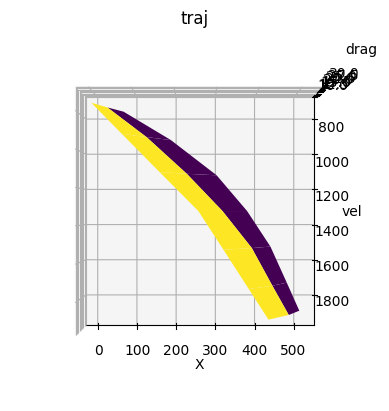

In [42]:
# Reshape the DataFrame into a pivot table
pivot_table = data.pivot(index='vel', columns='drag', values='x')

# Convert the data to a 2D numpy array
X = pivot_table.values


# Create the X and Y coordinate grids
D, V = np.meshgrid(pivot_table.columns, pivot_table.index)


# Create a 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface, ignoring NaN values
ax.plot_surface(X, V, D, cmap='viridis')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('vel')
ax.set_zlabel('drag')
ax.set_title('traj')


ax.invert_xaxis()

ax.view_init(90, 90)

# Show the plot
plt.show()

LinearRegression()

Text(0.5, 0, 'X_pred')

Text(0.5, 0.5, 'vel')

Text(0.5, 0, 'drag')

Text(0.5, 0.92, 'traj')

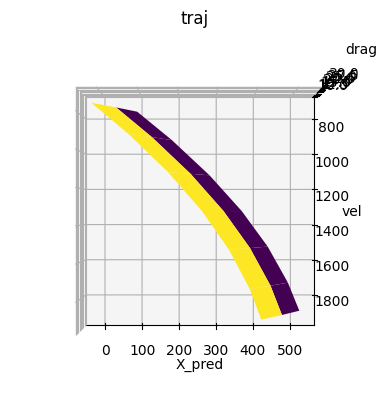

In [43]:
# Flatten the X, Y, and Z arrays
X_flat = X.flatten()
V_flat = V.flatten()
D_flat = D.flatten()


degree = 2  # Set the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree, interaction_only=False)
VD_poly = poly_features.fit_transform(np.column_stack((V_flat, D_flat)))

# Perform polynomial regression
model = LinearRegression()
model.fit(VD_poly, X_flat)

# Generate predictions for the grid points
X_pred = model.predict(VD_poly)

# Reshape the predicted values back to a 2D array
X_pred = X_pred.reshape(X.shape)



# Create a 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface, ignoring NaN values
ax.plot_surface(X_pred, V, D, cmap='viridis')

# Set labels and title
ax.set_xlabel('X_pred')
ax.set_ylabel('vel')
ax.set_zlabel('drag')
ax.set_title('traj')


ax.invert_xaxis()

ax.view_init(90, 90)

# Show the plot
plt.show()

In [44]:
# Retrieve the coefficients from the trained model
coef = model.coef_
intercept = model.intercept_

# Define the equation for the prediction
equation = f"x = {intercept}"

for i, c in enumerate(coef[1:], start=1):
    power = poly_features.powers_[i]
    equation += f" + {c} * vel^{power[0]} * drag^{power[1]}"

print("Equation for the model prediction:")
print(equation)
print("Equation in python form:")
print(equation.replace('^','**'))

Equation for the model prediction:
x = -454.1109719968744 + 0.920975633806626 * vel^1 * drag^0 + -3.5281349354281684 * vel^0 * drag^1 + -0.00019912799779653323 * vel^2 * drag^0 + -0.0007382687005499898 * vel^1 * drag^1 + -0.02196699999990539 * vel^0 * drag^2
Equation in python form:
x = -454.1109719968744 + 0.920975633806626 * vel**1 * drag**0 + -3.5281349354281684 * vel**0 * drag**1 + -0.00019912799779653323 * vel**2 * drag**0 + -0.0007382687005499898 * vel**1 * drag**1 + -0.02196699999990539 * vel**0 * drag**2


In [31]:
def trajplot_x_vd(vel, drag):
    x = -119.27311679936585 + 0.1310360825751968 * vel**1 * drag**0 + -14.509634466688668 * vel**0 * drag**1 + -4.508956766569039e-07 * vel**2 * drag**0 + 0.0014529141150055665 * vel**1 * drag**1 + -0.004804810480900542 * vel**0 * drag**2
    
    return x

Text(0.5, 0, 'X_pred')

Text(0.5, 0.5, 'vel')

Text(0.5, 0, 'drag')

Text(0.5, 0.92, 'traj')

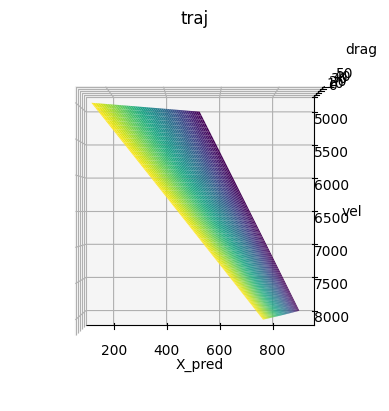

In [32]:
# Generate predictions for the grid points
V_ext = np.linspace(5000, 8000, 100)
D_ext = np.linspace(0, 50, 100)
V_ext, D_ext = np.meshgrid(V_ext, D_ext)
X_pred_ext = trajplot_x_vd(V_ext, D_ext)

# Reshape the predicted values back to a 2D array
X_pred_ext = X_pred_ext.reshape(V_ext.shape)



# Create a 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface, ignoring NaN values
ax.plot_surface(X_pred_ext, V_ext, D_ext, cmap='viridis')

# Set labels and title
ax.set_xlabel('X_pred')
ax.set_ylabel('vel')
ax.set_zlabel('drag')
ax.set_title('traj')


ax.invert_xaxis()

ax.view_init(90, 90)

# Show the plot
plt.show()

(0.0, 500.0)

(5000.0, 8000.0)

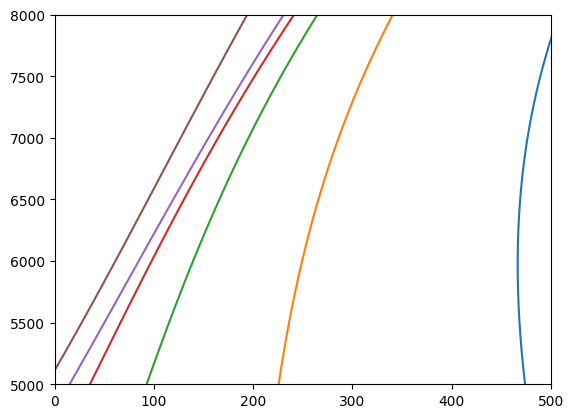

In [30]:
V_ext = np.linspace(5000, 8000, 100)

fig = plt.figure()
plt.plot(trajplot_x_vd(V_ext, 5), V_ext)
plt.plot(trajplot_x_vd(V_ext, 10), V_ext)
plt.plot(trajplot_x_vd(V_ext, 15), V_ext)
plt.plot(trajplot_x_vd(V_ext, 20), V_ext)
plt.plot(trajplot_x_vd(V_ext, 25), V_ext)
plt.plot(trajplot_x_vd(V_ext, 30), V_ext)
#plt.plot(trajplot_x_vd(V_ext, 40), V_ext)

plt.xlim([0, 500])
plt.ylim([5000, 8000])



    